In [7]:
import caiman as cm
import labrotation.file_handling as fh
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cnmf_path = fh.open_file("Open hdf5 caiman file")

In [3]:
cnmf = cm.source_extraction.cnmf.cnmf.load_CNMF(cnmf_path)

In [4]:
cnmf.estimates.nb_view_components(denoised_color="red")

In [9]:
#fig = plt.figure(figsize=(18,18))
cnmf.estimates.plot_contours_nb()
#plt.show()

In [23]:
# need C and 
cnmf.estimates.C

(511, 577)

In [56]:
covmat = np.cov(cnmf.estimates.C)
corrmat = np.corrcoef(cnmf.estimates.C)

In [57]:
covmat

array([[   72.9533,   -49.7943,     6.4878, ...,    18.6996,  -169.2333,
           90.2274],
       [  -49.7943,   546.8454,   -12.5141, ...,  -114.4775,  -355.7404,
         -155.3397],
       [    6.4878,   -12.5141,    98.1161, ...,   -31.0351,   -91.5162,
          -72.9894],
       ...,
       [   18.6996,  -114.4775,   -31.0351, ...,   605.7476,    56.3262,
         -171.845 ],
       [ -169.2333,  -355.7404,   -91.5162, ...,    56.3262,  8062.5581,
        -1062.0429],
       [   90.2274,  -155.3397,   -72.9894, ...,  -171.845 , -1062.0429,
         5823.8119]])

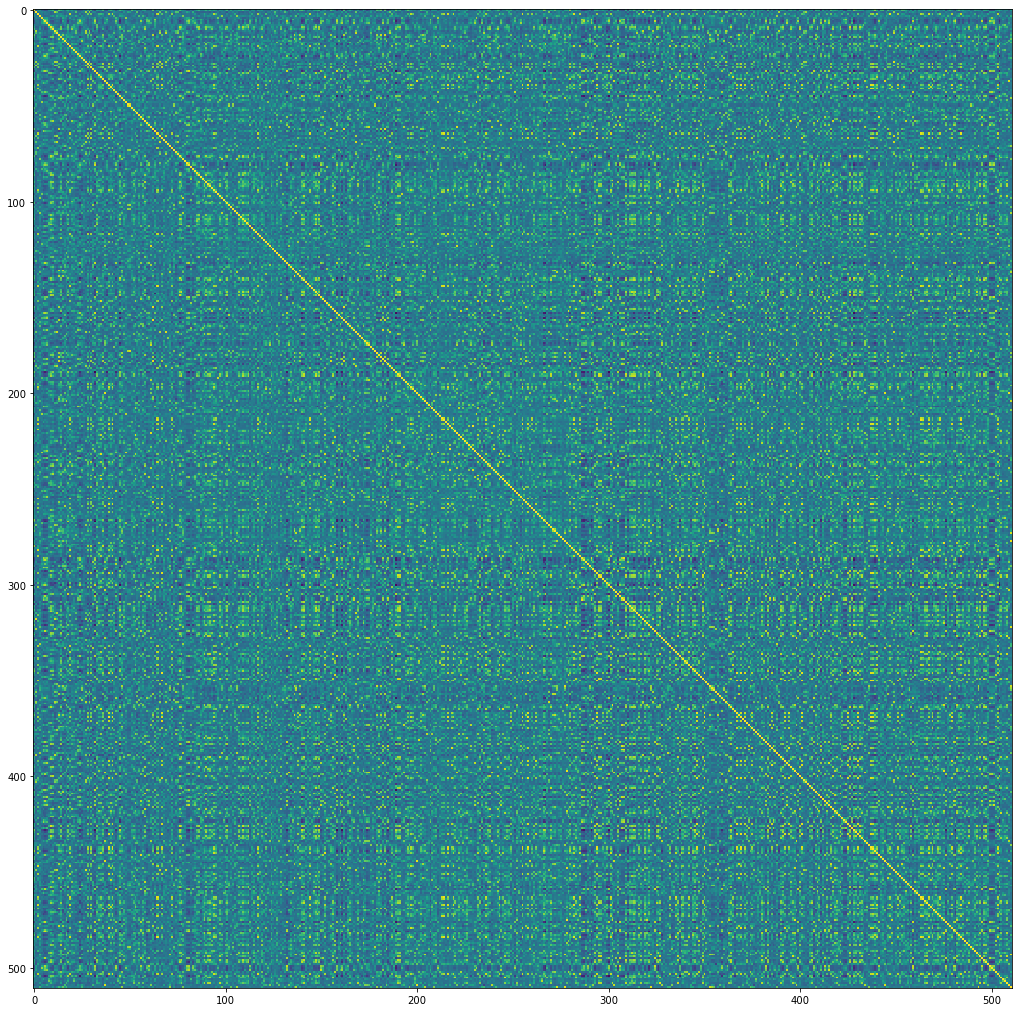

In [61]:
fig = plt.figure(figsize=(18,18))
plt.imshow(corrmat, interpolation="none")
plt.show()

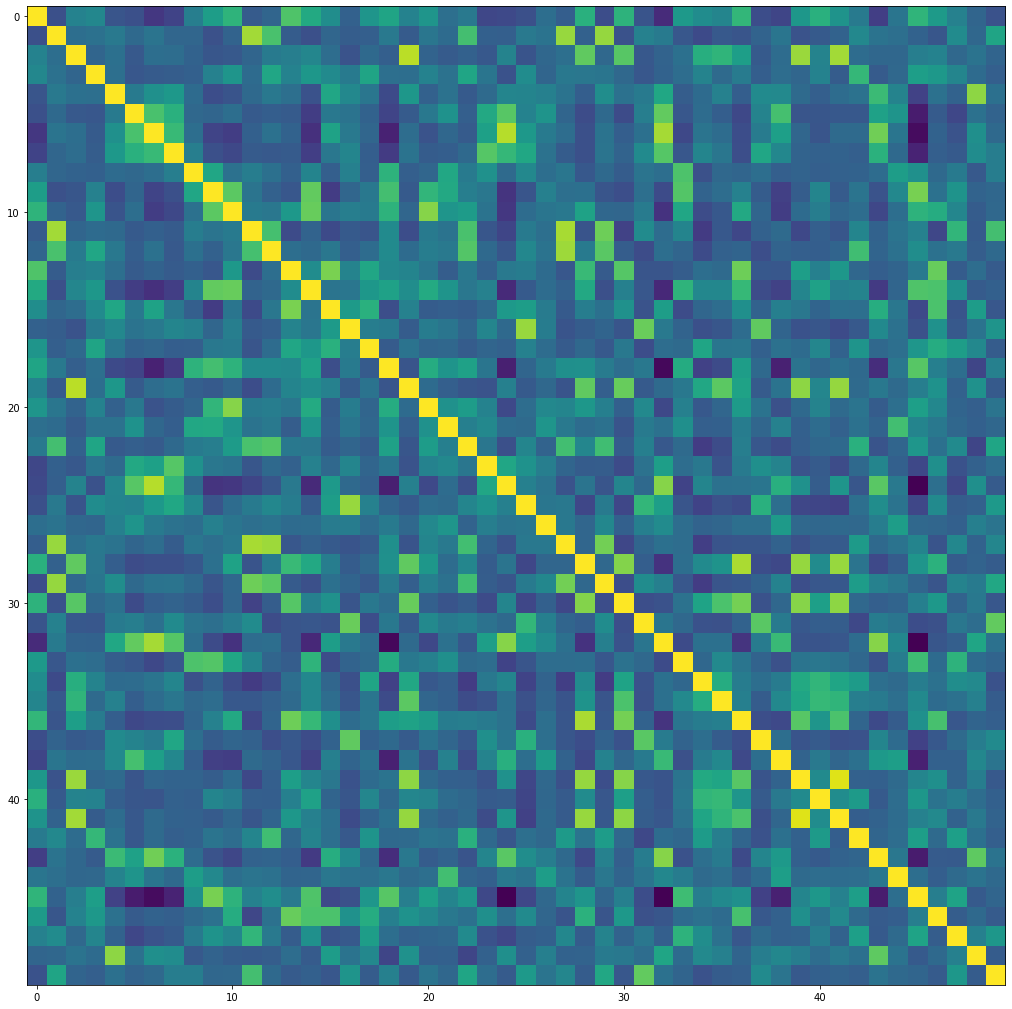

In [59]:
fig = plt.figure(figsize=(18,18))
plt.imshow(corrmat[:50, :50], interpolation="none")
plt.show()

# Visualise connections as graph
https://stackoverflow.com/questions/60392714/nodes-clusters-on-weighted-graph-visualization
https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777#43541777

In [33]:
from pyvis.network import Network

In [42]:
n_neurons = 50

In [58]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
net.force_atlas_2based()
for i in range(n_neurons):
    net.add_node(i)
for i in range(n_neurons):
    for j in range(i+1, n_neurons):
        net.add_edge(i, j, weight=(covmat[i,j] + 1)/2)

#net.toggle_physics(True)
net.show("vis.html")

D:\Software\Anaconda\envs\phd\envs\caiman\lib\site-packages\netgraph\_edge_layout.py:761: RuntimeWarning: invalid value encountered in true_divide
  displacement = compatibility * delta / distance_squared[..., None]


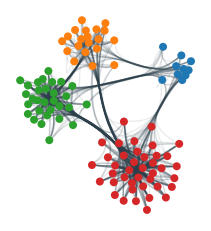

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

# installation easiest via pip:
# pip install netgraph
from netgraph import Graph

# create a modular graph
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()

In [64]:
# TODO: use igraph to plot graph? https://igraph.org/python/tutorial/latest/tutorial.html#layout-algorithms

In [65]:
# TODO: get physical distance of neurons, too? Then we can plot distance-correlation as scatter plot.

In [ ]:
# TODO: rastermap uses time lag values as well. It is a good idea to calculate the max of correlations 
#  for various time lags, as some cells might have delayed correlation